# 1. Domain Proyek
Dilansir dari [Halodoc](https://www.halodoc.com/kesehatan/diabetes), diabetes adalah penyakit kronis atau yang berlangsung jangka panjang. Penyakit ini ditandai dengan meningkatnya kadar gula darah (glukosa) hingga di atas nilai normal. Diabetes terjadi ketika tubuh pengidapnya tidak lagi mampu mengambil gula (glukosa) ke dalam sel dan menggunakannya sebagai energi. Kondisi ini pada akhirnya menghasilkan penumpukan gula ekstra dalam aliran darah tubuh.

Salah satu faktor penyebab diabetes adalah karena adanya gangguan dalam tubuh, sehingga tubuh tidak mampu menggunakan glukosa dara ke dalam hati. Sehingga, glukosa menumpuk dalam darah. Oleh karena itu, salah satu cara yang dapat dilakukan untuk mencegah diabetes dengan mengembangkan model machine learning yang dapat memprediksi apakah seseorang terindikasi diabetes atau tidak berdsarkan parameter-paremeter tertentu [[1]](https://www.halodoc.com/kesehatan/diabetes).

# 2. Business Understanding
## 2.1 Problem statements
- Bagaimana membuat model yang memungkinkan untuk melakukan prediksi diabetes pada seseorang?
- Model machine learning manakah yang dapat menyelasikan permasalahan dengan baik?

## 2.2 Goals
- Mengetahui karakteristik yang berpengaruh terhadap diabetes.
- Mengetahui model yang terbaik untuk memprediksi diabetes pada seseorang.

## 2.3 Solution statements
Untuk mencapai tujuan, masalah ini dapat menggunakan perbangingan dari beberapa model, diantaranya adalah sebagai berikut.
- K-Nearest Neighbor
K-Nearest Neighbor (KNN) adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). KNN bisa digunakan untuk kasus klasifikasi dan regresi sehingga cocok digunakan untuk permasalah klasifikasi diabetes [[2]](https://www.dicoding.com/academies/319/tutorials/18580).

- Random Forest
Random Forest adalah algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni. Algoritma ini juga merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir [[3]](https://www.dicoding.com/academies/319/tutorials/18585?from=18580). 

- Boosting
Sama halnya seperti algoritma random forest, algortima Boosting juga merupakan salah satu algoritma machine learning yang termasuk ke dalam kategori ensembel. Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan [[4]](https://www.dicoding.com/academies/319/tutorials/18590?from=18585).

    Algoritma boosting bertujuan untuk meningkatkan performa akurasi prediksi dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.

# 3. Data Understanding
Dataset yang digunakan adalah data [diabetes](https://www.kaggle.com/code/swetarajsinha/prediction-diabetes-logistic-regression/data) yang memiliki 2000 baris dan 9 kolom. Berikut adalah 9 kolom yang akan digunakan.

- **Pregnancies**: Kategori kehamilan
- **Glucose**: Kadar gula pada tubuh
- **BloodPressure**: Tekanan darah
- **SkinThickness**: Tingkat ketebalan kulit
- **Insulin**: Insulin
- **BMI**: Berat badan
- **DiabetesPedigreeFunction**: Fungsi silsilah diabetes
- **Age**: Usia
- **Outcome**: Indikasi apakah pasien terindikasi diabetes (1) atau tidak (0).

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4. Data Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
dataset = '/content/drive/My Drive/Bangkit/Machine-Learning-Terapan/Dataset/train/diabetes.csv'

In [12]:
# Melihat data training
diabetes = pd.read_csv(dataset)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [13]:
diabetes.shape

(2000, 9)

Pada hasil di atas, dapat kita ketahui bahwa pada data training terdapat 2000 baris data dan 9 kolom.

# 5. Explaratory Data Analysis

## 5.1 Deskripsi Variabel

In [14]:
cols = diabetes.columns
print('\n'.join(diabetes))

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


### Mengecek deskripsi statistik data.

In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Berdaarkan hasil di atas, insight yang diperoleh adalah sebagai berikut.
- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.
- Beberapa atribut pada data terdapat nilai 0
- Atribut Pregnancies, SkinThickness, dan Insulin memiliki
- Tidak terdapat atribut yang berisi NAN/Nilai null
- Tidak terdapat atribut dengan tipe object.

## 5.2 Menangani missing value
Dari hasil pengecekan deskripsi variabel, nilai minimum pada semua kolom adalah 0 kecuali kolom **DiabetesPedigreeFunction** dan **Age**. Selanjutnya adalah mengecek jumlah missing value. Pregnancies dan Outcome merupakan kolom numerik, sehingga tidak perlu dicek.

In [17]:
# pregnancies = (diabetes.Pregnancies == 0).sum()
glucose = (diabetes.Glucose == 0).sum()
blood_pressure = (diabetes.BloodPressure == 0).sum()
skin_thickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()

# print(f'nilai 0 pada kolom Pregnanicies: {pregnancies}')
print(f'nilai 0 pada kolom Glucose: {glucose}')
print(f'nilai 0 pada kolom BloodPressure: {blood_pressure}')
print(f'nilai 0 pada kolom SkinThickness: {skin_thickness}')
print(f'nilai 0 pada kolom Insulin: {insulin}')
print(f'nilai 0 pada kolom BMI: {bmi}')

nilai 0 pada kolom Glucose: 13
nilai 0 pada kolom BloodPressure: 90
nilai 0 pada kolom SkinThickness: 573
nilai 0 pada kolom Insulin: 956
nilai 0 pada kolom BMI: 28


Selanjutnya cek apakah data bernilai 0 pada salah satu dimensi juga terdapat pada dimensi yang lain? Cek pada kolom dengan jumlah missing value terbanyak

In [19]:
# diabetes.loc[(diabetes['Insulin'] == 0)]

Bedasarkan hasil pengecekan di atas, seluruh data yang bernilai 0 pada dimensi lainnya juga memiliki nilai 0 pada dimensi Insulin

In [20]:
glucose_col = diabetes['Glucose']
blood_pressure_col = diabetes['BloodPressure']
skin_thickness_col = diabetes['SkinThickness']
insulin_col = diabetes['Insulin']
bmi_col = diabetes['BMI']

glucose_col.replace(to_replace=0, value=glucose_col.mean(), inplace=True)
blood_pressure_col.replace(to_replace=0, value=blood_pressure_col.mean(), inplace=True)
skin_thickness_col.replace(to_replace=0, value=skin_thickness_col.mean(), inplace=True)
insulin_col.replace(to_replace=0, value=insulin_col.mean(), inplace=True)
bmi_col.replace(to_replace=0, value=bmi_col.mean(), inplace=True)

In [21]:
# pregnancies = (diabetes.Pregnancies == 0).sum()
glucose = (diabetes.Glucose == 0).sum()
blood_pressure = (diabetes.BloodPressure == 0).sum()
skin_thickness = (diabetes.SkinThickness == 0).sum()
insulin = (diabetes.Insulin == 0).sum()
bmi = (diabetes.BMI == 0).sum()

# print(f'nilai 0 pada kolom Pregnanicies: {pregnancies}')
print(f'nilai 0 pada kolom Glucose: {glucose}')
print(f'nilai 0 pada kolom BloodPressure: {blood_pressure}')
print(f'nilai 0 pada kolom SkinThickness: {skin_thickness}')
print(f'nilai 0 pada kolom Insulin: {insulin}')
print(f'nilai 0 pada kolom BMI: {bmi}')

nilai 0 pada kolom Glucose: 0
nilai 0 pada kolom BloodPressure: 0
nilai 0 pada kolom SkinThickness: 0
nilai 0 pada kolom Insulin: 0
nilai 0 pada kolom BMI: 0


Sekarang, semua nilai 0 telah diganti dengan rata-rata dari masing-masing kolom.

In [22]:
# Cek deskripsi
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.970186,72.257047,26.932878,118.615412,32.643702,0.470930,33.090500,0.342000
std,3.306063,30.533180,11.968614,9.884003,88.366170,7.190337,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.935000,80.254000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.000000,80.254000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Berdasarkan dari deskripsi stastik, nilai 0 hanya terdapat pada kolom Outcome dan Pregnancies yang merupakan kolom ketegorikal. Sehingga tidak perlu diganti.

## 5.3 Menangani otliers

#### Pregnancies

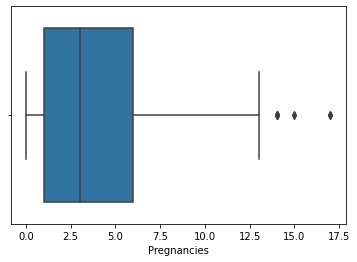

In [ ]:
sns.boxplot(x=diabetes['Pregnancies'])

#### Glucose

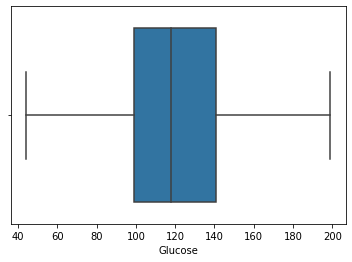

In [23]:
sns.boxplot(x=diabetes['Glucose'])

#### BloodPressure

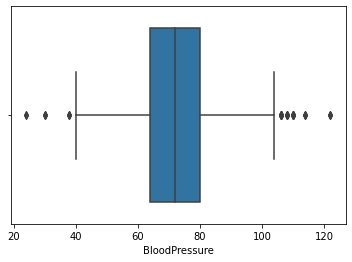

In [24]:
sns.boxplot(x=diabetes['BloodPressure'])

#### SkinThickness

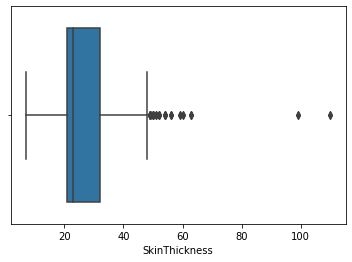

In [25]:
sns.boxplot(x=diabetes['SkinThickness'])

#### Insulin

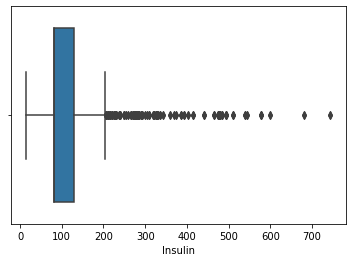

In [26]:
sns.boxplot(x=diabetes['Insulin'])

#### BMI

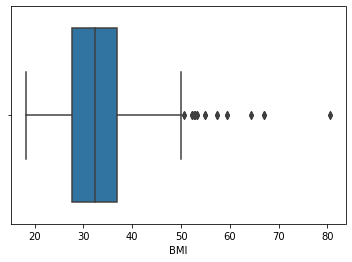

In [27]:
sns.boxplot(x=diabetes['BMI'])

#### Age

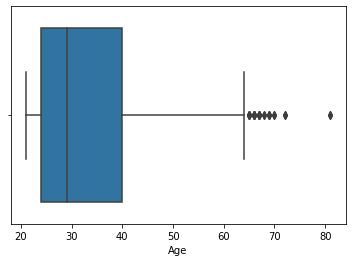

In [28]:
sns.boxplot(x=diabetes['Age'])

### Outcome

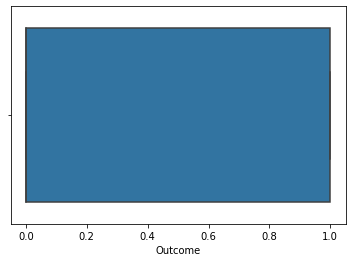

In [29]:
sns.boxplot(x=diabetes['Outcome'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers. Maka, langkah selanjutnya adalah mengatasi outliers tersebut dengan metode IQR.

In [30]:
Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

diabetes = diabetes[~((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
diabetes.shape

(1598, 9)

In [32]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1598 non-null   int64  
 1   Glucose                   1598 non-null   float64
 2   BloodPressure             1598 non-null   float64
 3   SkinThickness             1598 non-null   float64
 4   Insulin                   1598 non-null   float64
 5   BMI                       1598 non-null   float64
 6   DiabetesPedigreeFunction  1598 non-null   float64
 7   Age                       1598 non-null   int64  
 8   Outcome                   1598 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 124.8 KB


## 5.4 Univariate Analysis

#### Categorical Features

    jumlah sampel  persentase
1             290        18.1
2             234        14.6
0             229        14.3
3             169        10.6
4             160        10.0
5             107         6.7
6             107         6.7
7              82         5.1
8              64         4.0
9              58         3.6
10             48         3.0
11             17         1.1
13             17         1.1
12             16         1.0


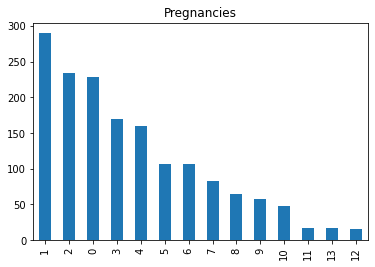

In [33]:
# Pregnancies
count = diabetes['Pregnancies'].value_counts()
percent = 100 * diabetes['Pregnancies'].value_counts(normalize=True)
df = pd.DataFrame({
    'jumlah sampel': count,
    'persentase': percent.round(1)})
print(df)
count.plot(kind='bar', title='Pregnancies')

Terdapat 14 kategori pada kolom **Pregnancies**. Berdasarkan dari hasil di atas, dapat disimpulkan bahwa terdapat 13.8% pasien dengan usia kehamilan di atas 8.

   jumlah sampel  persentase
0           1113        69.6
1            485        30.4


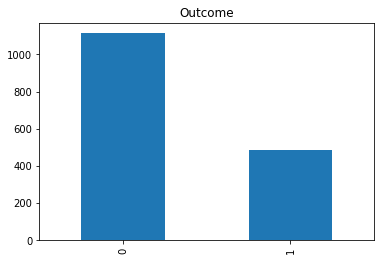

In [34]:
# Outcome
count = diabetes['Outcome'].value_counts()
percent = 100 * diabetes['Outcome'].value_counts(normalize=True)
df = pd.DataFrame({
    'jumlah sampel': count,
    'persentase': percent.round(1)})
print(df)
count.plot(kind='bar', title='Outcome')

Terdapat 2 kategori pada kolom target **Outcome**. Berdasarkan dari hasil di atas, dapat disimpulkan bahwa terdapat 69.6% pasien tidak terkena diabetes.

#### Numerical features

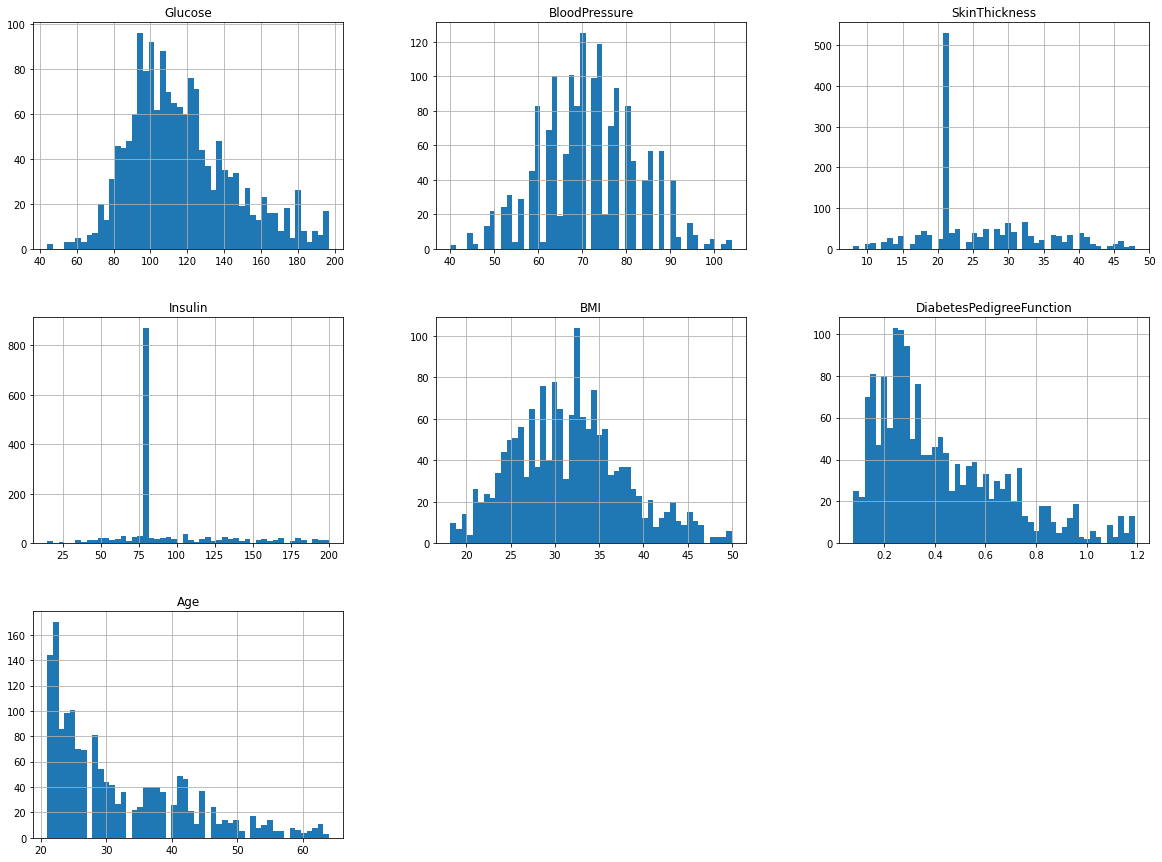

In [35]:
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].hist(bins=50, figsize=(20, 15))
plt.show()

## 5.5 Multivariate analysis
### Categorical features
mengecek rata-rata  terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap outcome

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


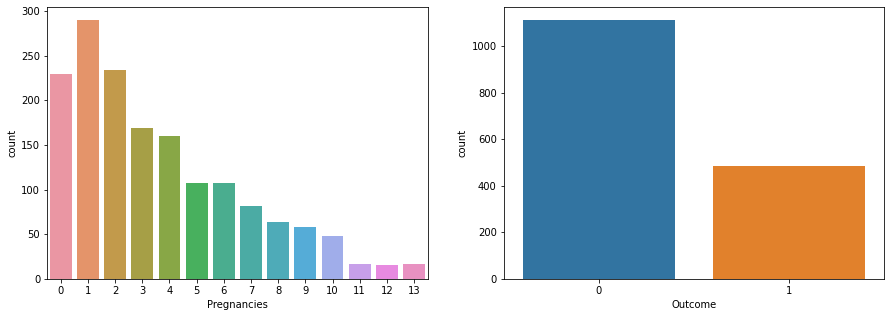

In [36]:
fig = plt.figure(figsize=(15,5))
for i,col in enumerate(['Pregnancies','Outcome']):
    ax = fig.add_subplot(1, 2, i + 1)
    sns.countplot(diabetes[col])

Berdasarkan dari hasil analisis di atas
- Lebih dari 1000 pasien tidak memiliki diabetes
- Data maksimum berada di 0, 1, dan 2 kehamilan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

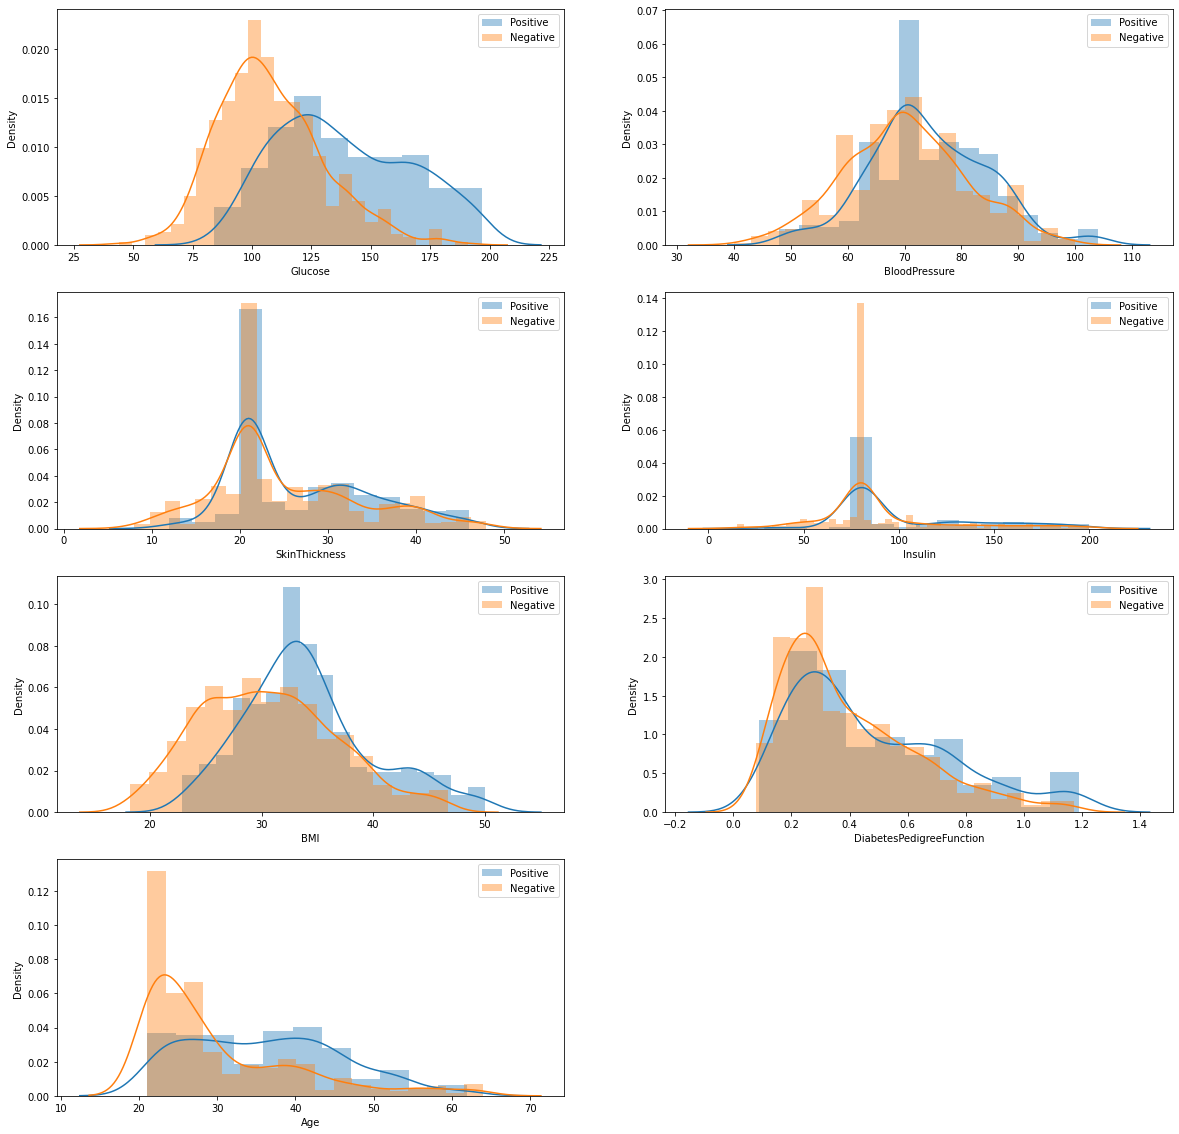

In [37]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(diabetes.drop(['Pregnancies','Outcome'],axis=1)):
    ax = fig.add_subplot(4, 2, i + 1)
    ax1 = sns.distplot(diabetes[col][diabetes['Outcome']==1],label='Positive')
    sns.distplot(diabetes[col][diabetes['Outcome']==0],label='Negative',ax=ax1)
    plt.legend()

Berdasarkan hasil dari analisis di atas, dapat disimpulkan
- Pasien yang memiliki Glukosa pada rentang 125-200 berpeluang tinggi terkena diabetes.
- Pasien yang memiliki teknan darah pad arentang 40-70 berada pada posisi aman dari diabetes.
- Pasien yang memiliki Ketebalan kulit pada rentang 28-45 berpeluang tinggi terkena diabetes.
- Pasien dengan insulin yang rendah ataupun tinggi berpeluang terkena diabetes.
- Pasien yang memiliki BMI pada rentang 30-50 berpeluang terkana diabetes.
- Pasien yang memiliki usia di atas 30 berpeluang tinggi terkena diabetes.

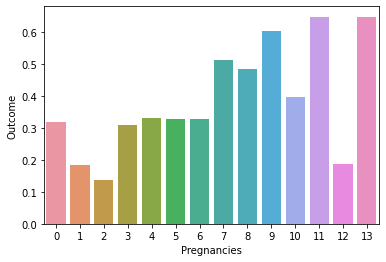

In [38]:
sns.barplot(x='Pregnancies', y='Outcome', data=diabetes, ci=None)

Dari graph di atas, dapat diambil kesimpulan bahwa tidak semua peasien dengan kehamilan tinggi berppeluang terkena diabetes, namun peluangnya masih tinggi.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

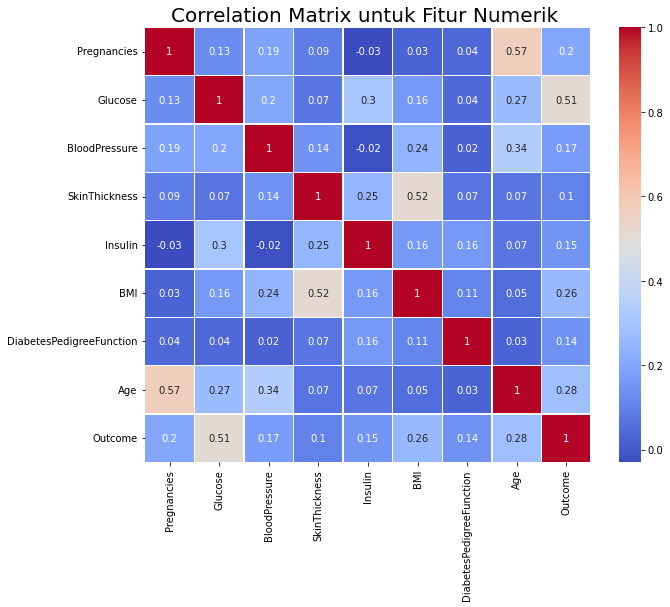

In [39]:
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada grafik koreasi di atas, kolom SkinThickness, Insulin, BMI, dan DiabetesPedigreeFuncition memiliki koreasi yang rendah, sehingga kolom tersbut dapat di drop.

In [40]:
# drop_cols = ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
# diabetes.drop(columns=drop_cols, inplace=True, axis=1)

# 6. Data Preparation

## 6.1 Split Dataset

In [88]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(diabetes)

# train set
x_train = train.iloc[:, 0:8]
y_train = train.iloc[:, 8:9]

# test set
x_test = test.iloc[:, 0:8]
y_test = test.iloc[:, 8:9]

# 7. Modelling

In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [111]:
models = pd.DataFrame(index=['train', 'test'],
                      columns=['KNN', 'DecisionTree', 'RandomForest'])

In [112]:
key = ['KNeighborsClassifier',
       'RandomForestClassifier',
       'AdaBoostClassifier']

value = [KNeighborsClassifier(n_neighbors=10), 
         RandomForestClassifier(n_estimators=40, random_state=42), 
         AdaBoostClassifier()]

models = dict(zip(key,value))

In [113]:
accuracy = pd.DataFrame(columns=['Accuracy'], index=key)

for name, algorithm in models.items():
  model = algorithm
  model.fit(x_train,y_train)
  predict = model.predict(x_test)
  accuracy.loc[name] = accuracy_score(y_test, predict)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
accuracy

,Accuracy
KNeighborsClassifier,0.8075
RandomForestClassifier,0.98
AdaBoostClassifier,0.8375


# Evaluation
Beredasarjan hasil pengembangan model dengan menggunakan algoritma KNN, Random Forest, dan AdaBoosting di atas. Dapat disimpulkan bahwa model yang menggunakan algoritma Random Forest memiliki akurasi tertinggi, yaitu 98%. Sehingga model ini solusi terbaik untuk melakukan klasifikasi diabetes.

In [115]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
prediction = rf_classifier.predict(x_test)

confusion_matrix = confusion_matrix(y_test, prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


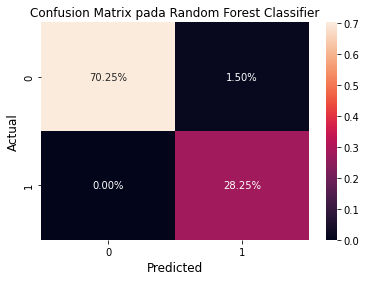

In [116]:
sns.heatmap(confusion_matrix / np.sum(confusion_matrix), annot=True, fmt='.2%')
plt.title('Confusion Matrix pada Random Forest Classifier', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [117]:
from sklearn.metrics import cohen_kappa_score, precision_score, recall_score

score = pd.DataFrame(columns=['Score'])

score.loc['Accuracy'] = accuracy_score(y_test, prediction)
score.loc['Precision'] = precision_score(y_test, prediction)
score.loc['Recall'] = recall_score(y_test, prediction)
score.loc['Kappa'] = cohen_kappa_score(y_test, prediction)

score

,Score
Accuracy,0.985000
Precision,0.949580
Recall,1.000000
Kappa,0.963584
